In [1]:
#%matplotlib notebook
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import ipywidgets as widgets
import time


def h(W,K,L):
  x = np.arange(0,L)
  h=np.sqrt(W/365/1000*25*(L**2-x**2)/K/(1025))
  return x,h

def tp(p,K,R,B,n,rs,rf):
    te = np.arctanh(p)/np.sqrt((4*K*R)/((0.25*np.pi*n*B)**2*rs/(rs-rf))) # elongate island
    tc = np.arctanh(p)/np.sqrt((4.5*K*R)/((n*B/2)**2*rs/(rs-rf))) # circular island
    return(te,tc)

def p(te,K,R,B,n,rs,rf):
    p=np.tanh(te*np.sqrt((4*K*R)/((0.25*np.pi*n*B)**2*rs/(rs-rf)))) # elongate island
    return(p)

In [2]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

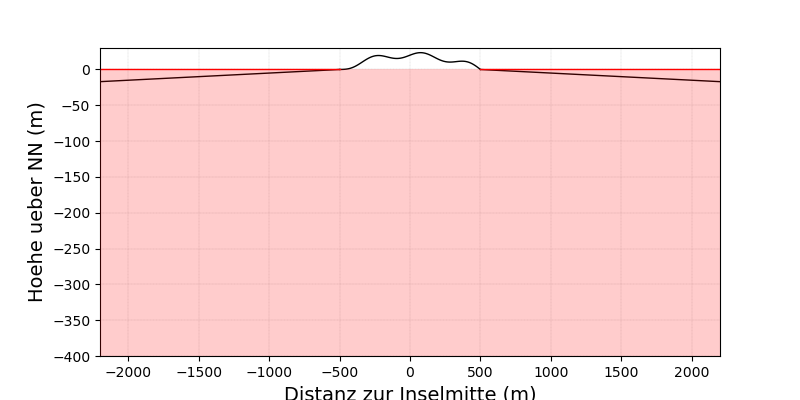

In [4]:

kf0 = 10.0
L0 = 2000.0/2
R0 = 50.0
n0 = 0.25
hi = h(R0,kf0,L0)[1]
h0max = hi[0] 

fig=plt.figure()
fig.set_size_inches((8,4.0))

xl1 = [-2500,-L0/2]
yl1 = [-20,0]
plt.plot(xl1,yl1,'k-',lw=1)

xl2 = [L0/2,2500]
yl2 = [0,-20]
plt.plot(xl2,yl2,'k-',lw=1)

xis=np.arange(-0.5,0.51,0.01)*L0
yis=((-(xis/L0)**2+0.25)*4*5+1*np.sin(3*2*np.pi*xis/L0))*4
plt.plot(xis,yis,'k-',lw=1)

xm1 = [-2500,-L0/2]
ym1 = [0,0]
xm2 = [2500,L0/2]
ym2 = [0,0]

plt.plot(xm1,ym1,'r-',lw=1)
plt.plot(xm2,ym2,'r-',lw=1)

poly_sea = patches.Polygon(np.array([[-2500,-2500,2500,2500],[0,-400,-400,0]]).transpose(),facecolor='r',zorder=9,alpha=0.2)

ax = plt.gca()
ax.set_xlim(-2200,2200)
ax.set_ylim(-400,30)
plt.ticklabel_format(scilimits=(-5, 8))
#ax.invert_yaxis()
ax.grid(linestyle='--',zorder=0,linewidth=0.2)
ax.add_patch(poly_sea)

plt.xlabel('Distanz zur Inselmitte (m)',fontsize=14)
plt.ylabel('Hoehe ueber NN (m)',fontsize=14) 
plt.tight_layout()

K=widgets.Dropdown(
    options=[('Feinsand (2 m/d)',2.0),('Mittelsand (10 m/d)',10.0),('Grobsand (100 m/d)',100.0)],
    index=1,
    description='Sediment:'
)


Length = widgets.IntSlider(
    value=1000, 
    min=500, max=4000, step=500, 
    description='Inselbreite (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Rech = widgets.IntSlider(
    value=200, 
    min=50, max=750, step=50, 
    description='Grundwasserneubildung (mm/a)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

poro = widgets.FloatSlider(
    value=0.3, 
    min=0.1, max=0.5, step=0.05, 
    description='Porositaet',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


button = widgets.Button(description="Berechne")



def on_button_clicked(b):
 kf = K.get_interact_value()   
 L = Length.get_interact_value()
 R = Rech.get_interact_value()   
 ne = poro.get_interact_value()
  
    
 xi,hi=h(R,kf,L/2)
 tau = tp(0.99,kf,R/1000/365,L,ne,1025,1000)[0]/365
 dt = 10   
 if tau < 20:
    dt = 2
 elif tau < 50:
    dt = 5
    
 tt = np.arange(0,tau,dt)
 tt = np.append(tt,tau)
 for tti in tt:
     pi = p(tti*365,kf,R/1000/365,L,ne,1025,1000)
     plt.clf()
     ax = plt.gca()
     xii = np.hstack([np.flipud(-xi),xi,np.flipud(xi),-xi])
     hii = np.hstack([-np.flipud(hi)*40*pi,-hi*40*pi,np.flipud(hi)*pi,hi*pi])  
     poly = patches.Polygon(np.array([xii,hii]).transpose(),facecolor='b',zorder=10,alpha=0.2,edgecolor='k')
     poly_sea = patches.Polygon(np.array([[-2500,-2500,2500,2500],[0,-400,-400,0]]).transpose(),facecolor='r',zorder=9,alpha=0.2)

     ax.grid(linestyle='--',zorder=0,linewidth=0.2)

     xl1 = [-2500,-L/2]
     yl1 = [-20,0]
     plt.plot(xl1,yl1,'k-',lw=1)

     xl2 = [L/2,2500]
     yl2 = [0,-20]
     plt.plot(xl2,yl2,'k-',lw=1)

     xis=np.arange(-0.5,0.51,0.01)*L
     yis=((-(xis/L)**2+0.25)*4*5+1*np.sin(3*2*np.pi*xis/L))*4
     plt.plot(xis,yis,'k-',lw=1)    

     xm1 = [-2500,-L/2]
     xm2 = [2500,L/2]
     plt.plot(xm1,ym1,'r-',lw=1)
     plt.plot(xm2,ym2,'r-',lw=1)
    
     ax.add_patch(poly_sea)   
     ax.add_patch(poly)
     #ax.plot(xii,hii,'k-',lw=0.7)
     ax.set_xlim(-2200,2200)
     ax.set_ylim(-400,30)
     plt.ticklabel_format(scilimits=(-5, 8))   
     #ax.invert_yaxis()
     plt.xlabel('Distanz zur Inselmitte (m)',fontsize=14)
     plt.ylabel('Hoehe ueber NN (m)',fontsize=14)     
     plt.title('%d Jahre' % tti)
     plt.tight_layout()
     fig.canvas.draw()
     time.sleep(0.3)
 


button.on_click(on_button_clicked)

vbox1=widgets.VBox([K,Length,Rech,poro])
vbox2=widgets.VBox([button])

box_layout = widgets.Layout(
        border='solid 1px white',
        margin='0px 0px 20px 0px',
        padding='5px 5px 20px 20px')
 
box2_lay=widgets.Layout(
        border='solid 1px white',
        margin='0px 0px 20px 0px',
        padding='5px 5px 20px 20px')#,
        #align_items='center')

vbox1.layout = box_layout
vbox2.layout = box2_lay
 

vbox1.layout.width = '400px'
vbox2.layout.width = '400px'

widgets.HBox([vbox1,vbox2])